# Market Risk- Returns and Risk

#### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
from skimpy import clean_columns
import warnings
warnings.filterwarnings("ignore")

C:\Users\shail\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Importing the dataset

In [2]:
stock_prices = pd.read_csv('Market+Risk+Dataset -16112022.csv')

#Glimpse of Data
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,7/4/2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [3]:
stock_prices.Date=stock_prices.Date.str.replace('/','-')
stock_prices

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,7-4-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243
...,...,...,...,...,...,...,...,...,...,...,...
309,2-3-2020,729,120,469,658,33,23110,401,146,3,22
310,9-3-2020,634,114,427,569,30,21308,384,121,6,18
311,16-03-2020,577,90,321,428,27,18904,365,105,3,16
312,23-03-2020,644,75,293,360,21,17666,338,89,3,14


In [4]:
#df['dayhours'] = pd.to_datetime(df['dayhours'])
stock_prices.Date=pd.to_datetime(stock_prices.Date)

In [5]:
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,2014-03-31,264,69,455,263,68,5543,555,298,83,278
1,2014-07-04,257,68,458,276,70,5728,610,279,84,303
2,2014-04-14,254,68,454,270,68,5649,607,279,83,280
3,2014-04-21,253,68,488,283,68,5692,604,274,83,282
4,2014-04-28,256,65,482,282,63,5582,611,238,79,243


In [6]:
# list of Companies

stock_prices.columns.to_list()[1:]

['Infosys',
 'Indian Hotel',
 'Mahindra & Mahindra',
 'Axis Bank',
 'SAIL',
 'Shree Cement',
 'Sun Pharma',
 'Jindal Steel',
 'Idea Vodafone',
 'Jet Airways']

In [7]:
stock_prices=clean_columns(stock_prices)
stock_prices.columns.to_list()

11 column names have been cleaned

['date',
 'infosys',
 'indian_hotel',
 'mahindra_&_mahindra',
 'axis_bank',
 'sail',
 'shree_cement',
 'sun_pharma',
 'jindal_steel',
 'idea_vodafone',
 'jet_airways']

In [8]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 314 non-null    datetime64[ns]
 1   infosys              314 non-null    int64         
 2   indian_hotel         314 non-null    int64         
 3   mahindra_&_mahindra  314 non-null    int64         
 4   axis_bank            314 non-null    int64         
 5   sail                 314 non-null    int64         
 6   shree_cement         314 non-null    int64         
 7   sun_pharma           314 non-null    int64         
 8   jindal_steel         314 non-null    int64         
 9   idea_vodafone        314 non-null    int64         
 10  jet_airways          314 non-null    int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 27.1 KB


#### Fixing messy column names (containing spaces) for ease of use

#### Checking top 5 rows again

In [9]:
stock_prices.head()


,date,infosys,indian_hotel,mahindra_&_mahindra,axis_bank,sail,shree_cement,sun_pharma,jindal_steel,idea_vodafone,jet_airways
0,2014-03-31,264,69,455,263,68,5543,555,298,83,278
1,2014-07-04,257,68,458,276,70,5728,610,279,84,303
2,2014-04-14,254,68,454,270,68,5649,607,279,83,280
3,2014-04-21,253,68,488,283,68,5692,604,274,83,282
4,2014-04-28,256,65,482,282,63,5582,611,238,79,243


#### First, let us check the number of rows (observations) and the number of columns (variables)

In [10]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


#### Checking data types of all columns

In [11]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 314 non-null    datetime64[ns]
 1   infosys              314 non-null    int64         
 2   indian_hotel         314 non-null    int64         
 3   mahindra_&_mahindra  314 non-null    int64         
 4   axis_bank            314 non-null    int64         
 5   sail                 314 non-null    int64         
 6   shree_cement         314 non-null    int64         
 7   sun_pharma           314 non-null    int64         
 8   jindal_steel         314 non-null    int64         
 9   idea_vodafone        314 non-null    int64         
 10  jet_airways          314 non-null    int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 27.1 KB


In [12]:
stock_prices.date

0     2014-03-31
1     2014-07-04
2     2014-04-14
3     2014-04-21
4     2014-04-28
         ...    
309   2020-02-03
310   2020-09-03
311   2020-03-16
312   2020-03-23
313   2020-03-30
Name: date, Length: 314, dtype: datetime64[ns]

#### Now, let us check the basic measures of descriptive statistics for the continuous variables

In [13]:
# pd.options.display.float_format='{:0.2f}'.format
stock_prices.describe().T

,count,mean,std,min,25%,50%,75%,max
infosys,314.0,511.340764,135.952051,234.0,424.00,466.5,630.75,810.0
indian_hotel,314.0,114.560510,22.509732,64.0,96.00,115.0,134.00,157.0
mahindra_&_mahindra,314.0,636.678344,102.879975,284.0,572.00,625.0,678.00,956.0
axis_bank,314.0,540.742038,115.835569,263.0,470.50,528.0,605.25,808.0
sail,314.0,59.095541,15.810493,21.0,47.00,57.0,71.75,104.0
shree_cement,314.0,14806.410828,4288.275085,5543.0,10952.25,16018.5,17773.25,24806.0
sun_pharma,314.0,633.468153,171.855893,338.0,478.50,614.0,785.00,1089.0
jindal_steel,314.0,147.627389,65.879195,53.0,88.25,142.5,182.75,338.0
idea_vodafone,314.0,53.713376,31.248985,3.0,25.25,53.0,82.00,117.0
jet_airways,314.0,372.659236,202.262668,14.0,243.25,376.0,534.00,871.0


In [14]:
#### Lets us plot & see price trend over time for different companies

# 2.1 Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference
4

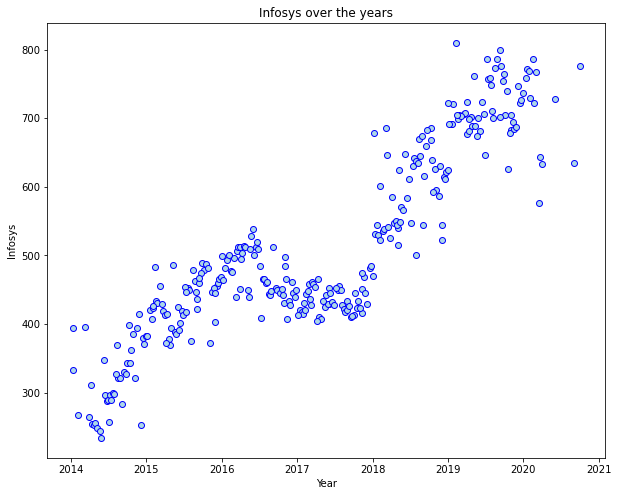

In [15]:
plt.figure(figsize = (10, 8))
plt.scatter(stock_prices['date'], stock_prices['infosys'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Infosys over the years')
plt.show()

In [16]:
stock_prices.infosys.describe()

count    314.000000
mean     511.340764
std      135.952051
min      234.000000
25%      424.000000
50%      466.500000
75%      630.750000
max      810.000000
Name: infosys, dtype: float64

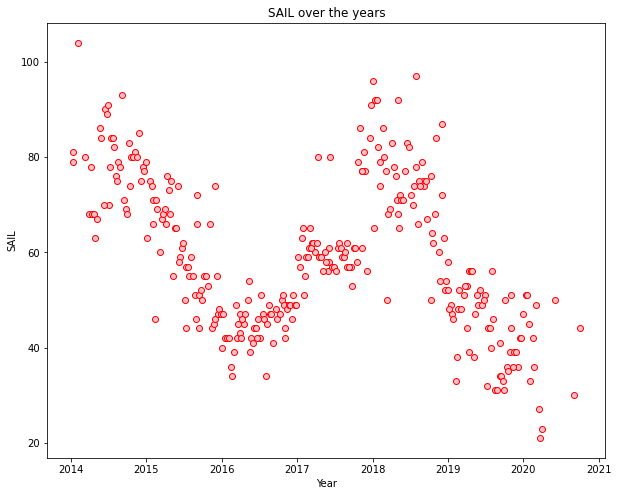

In [17]:
plt.figure(figsize = (10, 8))
plt.scatter(stock_prices['date'], stock_prices['sail'], edgecolors='r', color = 'pink')
plt.xlabel('Year')
plt.ylabel('SAIL')
plt.title('SAIL over the years')
plt.show()

In [18]:
stock_prices.sail.describe()

count    314.000000
mean      59.095541
std       15.810493
min       21.000000
25%       47.000000
50%       57.000000
75%       71.750000
max      104.000000
Name: sail, dtype: float64

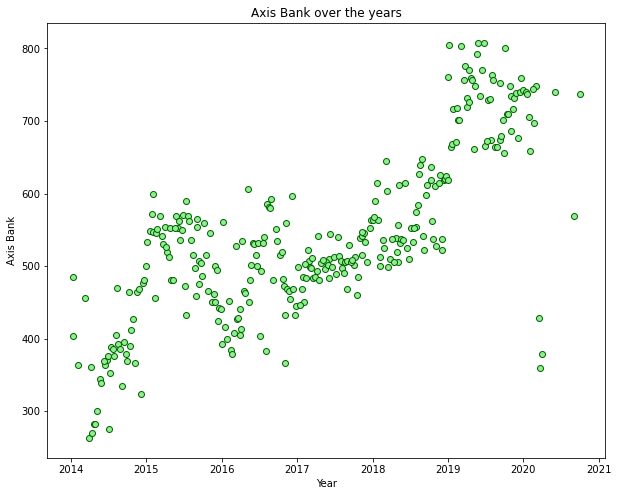

In [19]:
plt.figure(figsize = (10, 8))
plt.scatter(stock_prices['date'], stock_prices['axis_bank'], edgecolors='darkgreen', color = 'lightgreen')
plt.xlabel('Year')
plt.ylabel('Axis Bank')
plt.title('Axis Bank over the years')

plt.show()

# 2.2 Calculate Returns for all stocks with inference
3

Steps for calculating returns from prices:
- Take logarithms
- Take differences

In [20]:
# data is weekly , therefore we will get the weekly returns

In [28]:
stock_returns = np.log(stock_prices.drop(['date'],axis=1)).diff(axis = 0, periods = 1).T


#### Checking the rows & columns of dataset

In [29]:
stock_returns.shape

(10, 314)

#### Checking top 5 rows 

In [32]:
stock_returns

,0,1,2,3,4,5,6,7,8,9,...,304,305,306,307,308,309,310,311,312,313
infosys,NaN,-0.026873,-0.011742,-0.003945,0.011788,-0.031749,0.019961,-0.036221,-0.041847,0.135666,...,-0.003894,-0.002604,0.011666,0.012804,-0.084932,0.009649,-0.139625,-0.094207,0.109856,-0.017228
indian_hotel,NaN,-0.014599,0.000000,0.000000,-0.045120,-0.015504,0.060625,0.199333,-0.012121,0.081917,...,-0.042560,0.007220,-0.044125,0.044125,-0.036634,-0.110348,-0.051293,-0.236389,-0.182322,0.000000
mahindra_&_mahindra,NaN,0.006572,-0.008772,0.072218,-0.012371,0.040656,0.011881,0.038615,0.064183,-0.003559,...,-0.039716,0.043250,-0.084609,0.003831,-0.139284,0.030305,-0.093819,-0.285343,-0.091269,-0.031198
axis_bank,NaN,0.048247,-0.021979,0.047025,-0.003540,0.061875,0.076961,0.059898,-0.014642,0.071154,...,-0.044390,0.059205,-0.014815,0.009453,-0.065256,-0.057580,-0.145324,-0.284757,-0.173019,0.051432
sail,NaN,0.028988,-0.028988,0.000000,-0.076373,0.061558,0.112795,0.136859,-0.023530,0.213574,...,-0.125163,0.085158,-0.107631,-0.046520,-0.154151,-0.087011,-0.095310,-0.105361,-0.251314,0.090972
shree_cement,NaN,0.032831,-0.013888,0.007583,-0.019515,0.011400,0.067622,0.056790,0.048090,0.105167,...,-0.031539,0.105826,-0.019663,-0.001070,-0.073776,0.023688,-0.081183,-0.119709,-0.067732,-0.006816
sun_pharma,NaN,0.094491,-0.004930,-0.004955,0.011523,-0.008217,-0.016639,-0.049881,0.044835,-0.018724,...,-0.057820,0.018868,-0.028438,-0.034233,-0.074874,0.072383,-0.043319,-0.050745,-0.076851,0.040585
jindal_steel,NaN,-0.065882,0.000000,-0.018084,-0.140857,0.024898,0.097543,0.105732,-0.010084,0.132686,...,-0.123753,0.170273,-0.035994,0.010417,-0.225738,-0.053346,-0.187816,-0.141830,-0.165324,-0.081917
idea_vodafone,NaN,0.011976,-0.011976,0.000000,-0.049393,0.012579,0.048790,-0.024098,-0.012270,0.024391,...,-0.182322,0.000000,-0.510826,0.287682,0.000000,-0.287682,0.693147,-0.693147,0.000000,0.000000
jet_airways,NaN,0.086112,-0.078943,0.007117,-0.148846,-0.016598,0.020705,0.169258,-0.181630,0.072031,...,-0.223144,-0.036368,0.036368,0.000000,-0.113329,-0.127833,-0.200671,-0.117783,-0.133531,0.000000


In [38]:
a=stock_returns.T.describe().T
a

,count,mean,std,min,25%,50%,75%,max
infosys,313.0,0.002794,0.035070,-0.167300,-0.014514,0.004376,0.024553,0.135666
indian_hotel,313.0,0.000266,0.047131,-0.236389,-0.023530,0.000000,0.027909,0.199333
mahindra_&_mahindra,313.0,-0.001506,0.040169,-0.285343,-0.020884,0.001526,0.019894,0.089407
axis_bank,313.0,0.001167,0.045828,-0.284757,-0.022473,0.001614,0.028522,0.127461
sail,313.0,-0.003463,0.062188,-0.251314,-0.040822,0.000000,0.032790,0.309005
shree_cement,313.0,0.003681,0.039917,-0.129215,-0.019546,0.003173,0.029873,0.152329
sun_pharma,313.0,-0.001455,0.045033,-0.179855,-0.020699,0.001530,0.023257,0.166604
jindal_steel,313.0,-0.004123,0.075108,-0.283768,-0.049700,0.000000,0.037179,0.243978
idea_vodafone,313.0,-0.010608,0.104315,-0.693147,-0.045120,0.000000,0.024391,0.693147
jet_airways,313.0,-0.009548,0.097972,-0.458575,-0.052644,-0.005780,0.036368,0.300249


In [40]:
a[['mean','std']]

,mean,std
infosys,0.002794,0.035070
indian_hotel,0.000266,0.047131
mahindra_&_mahindra,-0.001506,0.040169
axis_bank,0.001167,0.045828
sail,-0.003463,0.062188
shree_cement,0.003681,0.039917
sun_pharma,-0.001455,0.045033
jindal_steel,-0.004123,0.075108
idea_vodafone,-0.010608,0.104315
jet_airways,-0.009548,0.097972


# 2.3 Calculate Stock Means and Standard Deviation for all stocks with inference
3

### We now look at Means & Standard Deviations of these returns

- Stock Means: Average returns that the stock is making on a week to week basis
- Stock Standard Deviation : It is a measure of volatility meaning the more a stock's returns vary from the stock's average return, the more volatile the stock

#### Calculating stock means

In [24]:
stock_means = stock_returns.mean(axis = 0)
stock_means

infosys                0.002794
indian_hotel           0.000266
mahindra_&_mahindra   -0.001506
axis_bank              0.001167
sail                  -0.003463
shree_cement           0.003681
sun_pharma            -0.001455
jindal_steel          -0.004123
idea_vodafone         -0.010608
jet_airways           -0.009548
dtype: float64

#### Calculating stock standard deviation

In [25]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

infosys                0.035070
indian_hotel           0.047131
mahindra_&_mahindra    0.040169
axis_bank              0.045828
sail                   0.062188
shree_cement           0.039917
sun_pharma             0.045033
jindal_steel           0.075108
idea_vodafone          0.104315
jet_airways            0.097972
dtype: float64

In [42]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df.reset_index()

,index,Average,Volatility
0,infosys,0.002794,0.035070
1,indian_hotel,0.000266,0.047131
2,mahindra_&_mahindra,-0.001506,0.040169
3,axis_bank,0.001167,0.045828
4,sail,-0.003463,0.062188
5,shree_cement,0.003681,0.039917
6,sun_pharma,-0.001455,0.045033
7,jindal_steel,-0.004123,0.075108
8,idea_vodafone,-0.010608,0.104315
9,jet_airways,-0.009548,0.097972


#### Let us plot & see what they say about stock prices

# 2.4 Draw a plot of Stock Means vs Standard Deviation and state your inference
4.5

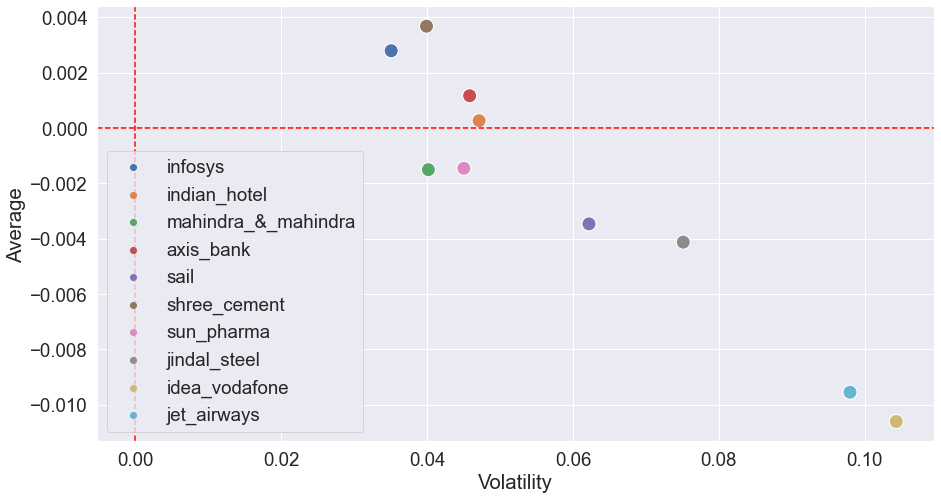

In [54]:
#plt.scatter(stock_sd, stock_means, edgecolors='r')
plt.figure(figsize = (15, 8))
sns.set(font_scale=1.7)
plot = sns.scatterplot(df['Volatility'], df['Average'],hue=df.index,s=200)
plot.axvline(x=0,linestyle='--', color = "red")
plot.axhline(y=0,linestyle='--', color = "red")
plt.legend(loc='best')
plt.show()

# 2.5 Conclusion and Recommendations
4